<a href="https://colab.research.google.com/github/anavianascientist/Machine_Learning/blob/master/Agrupamento_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Agrupamento com k-means

In [1]:
# Importação das bibliotecas
from sklearn import datasets
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Carregamento da base de dados 
iris = datasets.load_iris()
# visualização de quantos registros existem por classe
unicos, quantidade = np.unique(iris.target, return_counts = True)
unicos

array([0, 1, 2])

In [3]:
quantidade

array([50, 50, 50])

In [4]:
# Agrupamento com k-means, utilizando 3 clusters (de acordo com a base de dados)
cluster = KMeans(n_clusters = 3)
cluster.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
# Visualização dos três centroides
centroides = cluster.cluster_centers_
centroides

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [6]:
# Visualização dos grupos que cada registro foi associado
previsoes = cluster.labels_
previsoes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [7]:
# Contagem dos registros por classe
unicos2, quantidade2 = np.unique(previsoes, return_counts = True)
unicos2

array([0, 1, 2], dtype=int32)

In [8]:
quantidade2

array([38, 50, 62])

In [9]:
# Geração da matriz de contingência para comparar os grupos com a base de dados
resultados = confusion_matrix(iris.target, previsoes)
resultados

array([[ 0, 50,  0],
       [ 2,  0, 48],
       [36,  0, 14]])

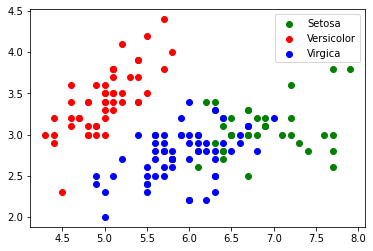

In [10]:
# Geração do gráfico com os clusters gerados, considerando para um (previsoes 0, 1 ou 2)
# Usamos somente as colunas 0 e 1 da base de dados original para termos 2 dimensões
plt.scatter(iris.data[previsoes == 0, 0], iris.data[previsoes == 0, 1], 
            c = 'green', label = 'Setosa')
plt.scatter(iris.data[previsoes == 1, 0], iris.data[previsoes == 1, 1], 
            c = 'red', label = 'Versicolor')
plt.scatter(iris.data[previsoes == 2, 0], iris.data[previsoes == 2, 1], 
            c = 'blue', label = 'Virgica')
plt.legend()